# 

In [1]:
from skimage import io
from skimage.color import rgb2lab
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.gray()

<Figure size 640x480 with 0 Axes>

In [3]:
buckets = 24
la = np.zeros((buckets,buckets))
lb = np.zeros((buckets,buckets))
ab = np.zeros((buckets,buckets))

In [41]:
# Para discretizar después
limitesL = np.arange(100/24, 100, 100/24)
limitesab = np.arange(-128, 127, 256/24)

In [48]:
def load_image(i):
    img_rgb = io.imread("imagenes/images_prepped_train/img("+str(i)+").jpg").astype("float32") / 255
    img_lab = rgb2lab(img_rgb)
    
    img_mask = io.imread("imagenes/annotations_prepped_train/img("+str(i)+").png").astype("float32") / 255
    pixeles_fuego = img_lab[img_mask == 1.0]

    L = np.searchsorted(limitesL, pixeles_fuego[:,0])
    a = np.searchsorted(limitesab, pixeles_fuego[:,1])
    b = np.searchsorted(limitesab, pixeles_fuego[:,2])

    for i in range(pixeles_fuego.shape[0]):
        la[L[i]][a[i]] += 1
        lb[L[i]][b[i]] += 1
        ab[a[i]][b[i]] += 1

In [49]:
for i in range(1,301):
    load_image(i)
la /= np.max(la)
lb /= np.max(lb)
ab /= np.max(ab)

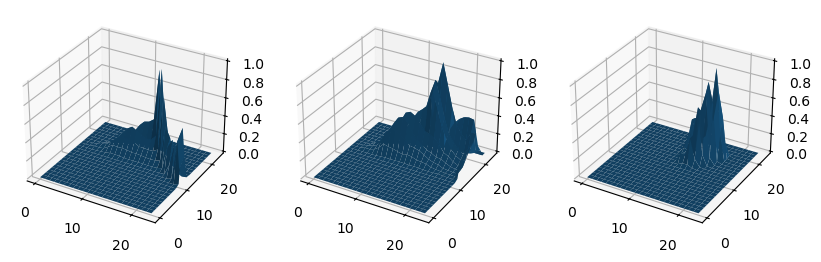

In [50]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

x = np.outer(np.arange(buckets), np.ones(buckets))
y = x.copy().T

ax1.plot_surface(x, y, la)
ax2.plot_surface(x, y, lb)
ax3.plot_surface(x, y, ab)

plt.show()

In [40]:
with open("probabilidades.npy", "wb") as f:
    np.save(f, la)
    np.save(f, lb)
    np.save(f, ab)